In [1]:
# Import necessary libraries
print("Importing Libraries...")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score, auc
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup, BertModel
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import joblib
import time
print("Libraries imported successfully.")

Importing Libraries...
Libraries imported successfully.


### Importing Necessary Libraries

In this section, we are importing various libraries and modules needed to build and train the machine learning model for detecting cyberbullying. These libraries handle different tasks, such as data preprocessing, model training, evaluation, and visualization. Here's a breakdown of the imports:

1. **Pandas (`import pandas as pd`)**:
   - A powerful data manipulation and analysis library that will be used to handle datasets (e.g., loading CSV files, data cleaning, and manipulation).
   
2. **NumPy (`import numpy as np`)**:
   - A library used for working with arrays and matrices, which is essential for numerical computing in machine learning tasks.

3. **Scikit-learn (`import ... from sklearn`)**:
   - **`train_test_split`**: Used to split the dataset into training and testing subsets.
   - **`TfidfVectorizer`**: This is used to convert text data into a numerical format based on the Term Frequency-Inverse Document Frequency (TF-IDF) method.
   - **`SVC` (Support Vector Classification)**: This is the implementation of the Support Vector Machine (SVM) classifier.
   - **`classification_report`, `confusion_matrix`, `roc_auc_score`, `roc_curve`, `f1_score`**: These are used for evaluating the performance of the model by calculating various metrics like accuracy, precision, recall, F1 score, and ROC AUC.

4. **Transformers (`from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup`)**:
   - **`BertTokenizer`**: A tokenizer for preprocessing text data that converts text into tokenized input compatible with BERT.
   - **`BertForSequenceClassification`**: The BERT model, pre-trained for sequence classification tasks, which will be used for detecting cyberbullying.
   - **`AdamW`**: A variation of the Adam optimizer used for fine-tuning BERT.
   - **`get_linear_schedule_with_warmup`**: This helps in creating a learning rate scheduler to gradually increase the learning rate during training and then decrease it.

5. **Torch (`import torch` and `import torch.nn.functional as F`)**:
   - **`torch`**: The main PyTorch library for deep learning, which will handle the computations and GPU acceleration for training models.
   - **`torch.nn.functional`**: This contains various functions, like loss functions, used during model training.

6. **Data Loading and Processing Libraries**:
   - **`DataLoader`, `Dataset`**: These PyTorch classes will be used for efficiently loading and batching the data for training the BERT model.

7. **Matplotlib and Seaborn (`import matplotlib.pyplot as plt`, `import seaborn as sns`)**:
   - These are popular libraries for data visualization. We'll use them for plotting performance metrics such as confusion matrices and ROC curves.

8. **Regular Expressions (`import re`)**:
   - A library for text preprocessing, helping clean and extract meaningful information from raw text.

9. **NLTK (`from nltk.corpus import stopwords`, `from nltk.stem import WordNetLemmatizer`)**:
   - **`stopwords`**: A collection of commonly used words (like "the", "is", "in", etc.) that will be removed from the text to improve model performance.
   - **`WordNetLemmatizer`**: This will be used to perform lemmatization, reducing words to their base form (e.g., "running" to "run").

10. **Label Encoding (`from sklearn.preprocessing import LabelEncoder`)**:
   - Used to encode the target labels (e.g., "bullying" or "non-bullying") into numeric values, which are required for machine learning models.

11. **Joblib (`import joblib`)**:
   - This will be used to save and load models after training, allowing us to avoid retraining them each time we run the program.

12. **Time (`import time`)**:
   - This will be used to track the time taken for certain operations, especially during model training.

---

These libraries collectively provide the tools needed for data preprocessing, model training, and evaluation. As we progress through the project, we will use them to build and test the machine learning models for cyberbullying detection.


In [2]:
# Specify the file path
file_path = r"C:\Users\HP\Documents\Implementation\Final.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Check for missing values
print("\nMissing Values \n")
print(df.isnull().sum())
print("\n")

# Dataset overview
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

                                             Message  Label
0                                         05/10/2015      1
1                                         05/11/2015      1
2                                         05/12/2015      1
3                                       - #HappilyMe      0
4  - & FUCK @tayyoung_ . Fat Ass ' Whatever Yo Ra...      1

Missing Values 

Message    0
Label      0
dtype: int64


Dataset contains 365830 rows and 2 columns.


### Loading and Inspecting the Dataset

In this section of the code, we are performing the initial steps to load and inspect the dataset.

1. **Specify the file path**:
   - The dataset is located at `"C:\Users\HP\Downloads\Real_Data\Final.csv"`, and this file path is assigned to the variable `file_path`. The `r` before the string ensures that the path is treated as a raw string, preventing any issues with special characters like backslashes.

2. **Load the dataset**:
   - Using the `pandas` library, the dataset is loaded into a DataFrame `df` with the following line:
     ```python
     df = pd.read_csv(file_path)
     ```
     `pd.read_csv()` is a function that reads data from a CSV file and converts it into a format that is easier to manipulate (a DataFrame). This will allow us to view, analyze, and preprocess the data in subsequent steps.

3. **Display the first few rows**:
   - To get an overview of the dataset, the first few rows are displayed using:
     ```python
     print(df.head())
     ```
     `df.head()` prints the first five rows of the dataset by default, giving a quick preview of the data, including the column names and some of the sample data. This helps in understanding the format and structure of the dataset.

4. **Check for missing values**:
   - We then check for any missing (null) values in the dataset using:
     ```python
     print("\nMissing Values \n")
     print(df.isnull().sum())
     ```
     `df.isnull()` returns a DataFrame with `True` for missing values and `False` otherwise. `.sum()` is applied to this DataFrame to count the number of missing values in each column. This step helps identify if any columns have missing data, which will need to be addressed before training the model.

5. **Dataset Overview**:
   - Finally, we print the total number of rows and columns in the dataset using:
     ```python
     print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
     ```
     `df.shape` returns a tuple where the first value (`df.shape[0]`) is the number of rows and the second value (`df.shape[1]`) is the number of columns. This gives us an idea of the size of the dataset, which is useful for understanding the scat for further processing and model training.


In [3]:
# Count the number of distinct rows
distinct_row_count = df.drop_duplicates().shape[0]
print(f"Number of distinct rows: {distinct_row_count}")

# Remove duplicate rows (keep only the first occurrence of each row)
df = df.drop_duplicates()

# Display the updated DataFrame shape
print(f"Updated DataFrame contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Save the cleaned dataset (optional)
output_path = r"C:\Users\HP\Documents\Implementation\Cleaned_Final.csv"
df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")

Number of distinct rows: 207940
Updated DataFrame contains 207940 rows and 2 columns.
Cleaned dataset saved to: C:\Users\HP\Documents\Implementation\Cleaned_Final.csv


wn

1. **Count the Number of Distinct Rows**
    ```python
    distinct_row_count = df.drop_duplicates().shape[0]
    print(f"Number of distinct rows: {distinct_row_count}")
    ```
    - This line of code counts the number of distinct rows in the DataFrame by removing duplicates using the `drop_duplicates()` method and then getting the shape of the resulting DataFrame. The count of distinct rows is then printed.

2. **Remove Duplicate Rows**
    ```python
    df = df.drop_duplicates()
    ```
    - This line removes duplicate rows from the DataFrame, keeping only the first occurrence of each row.

3. **Display Updated DataFrame Shape**
    ```python
    print(f"Updated DataFrame contains {df.shape[0]} rows and {df.shape[1]} columns.")
    ```
    - After removing duplicates, the updated shape of the DataFrame (number of rows and columns) is printed.

4. **Save the Cleaned Dataset (Optional)**
    ```python
    output_path = r"C:\Users\HP\Downloads\Real_Data\Cleaned_Final.csv"
    df.to_csv(output_path, index=False)
    print(f"Cleaned dataset saved to: {output_path}")
    ```
    - This optional step saves the cleaned DataFrame to a CSV file at the specified path. The file is saved without the index column. A message confirmin cleaned DataFrame to a CSV file.


In [4]:
# Calculate the total number of samples to take (1% of the dataset)
sample_size = int(len(df) * 0.01)

# Perform stratified sampling to maintain the original ratio of Labels
stratified_sample = df.groupby('Label', group_keys=False).apply(
    lambda x: x.sample(frac=sample_size / len(df), random_state=42)
)

# Reset index for the sampled data
df = stratified_sample.reset_index(drop=True)

# Display the sampled data
print(df)

                                                Message  Label
0     Umm if this movie has not even been started pr...      0
1     these niggas fake quick to break they will ben...      0
2                      Why are you related to the judge      0
3     Even more meticulous interpretations of the Pa...      0
4     It is the nature of science that scientists ma...      0
...                                                 ...    ...
2074  why did i have a dream that a girl that bullie...      1
2075  RT jackheathh Im not sexist but women drivers ...      1
2076  alt tik tok is slowly becoming the “this is MY...      1
2077  All right let's see who actually drops dub dbz...      1
2078  mkr mkr I think Kat thinks she is the best che...      1

[2079 rows x 2 columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_1880\547738030.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('Label', group_keys=False).apply(


This code performs stratified sampling on a dataset to maintain the original ratio of labels.

1. **Calculate the total number of samples to take (1% of the dataset)**:
    ```python
    sample_size = int(len(df) * 0.001)
    ```
   - `sample_size`: This variable is calculated as 1% of the total number of rows in the dataset `df`.

2. **Perform stratified sampling to maintain the original ratio of Labels**:
    ```python
    stratified_sample = df.groupby('Label', group_keys=False).apply(
        lambda x: x.sample(frac=sample_size / len(df), random_state=42)
    )
    ```
   - `stratified_sample`: This variable stores the result of stratified sampling. 
   - `df.groupby('Label', group_keys=False)`: This groups the dataset by the 'Label' column, maintaining the original order of groups.
   - `.apply(lambda x: x.sample(frac=sample_size / len(df), random_state=42))`: For each group, it takes a sample with a fraction equivalent to `sample_size / len(df)`, ensuring the sample maintains the original label ratio. The `random_state=42` ensures reproducibility.

3. **Reset the index for the sampled data**:
    ```python
    df = stratified_sample.reset_index(drop=True)
    ```
   - `df`: This reassigns the stratified sample to the original `df` variable, and resets its index to ensure a clean, sequential index.

4. **Display the sampled data**:
    ```python
    print(df)
    ```
   - This prints the sampled dataset `df` to the console.

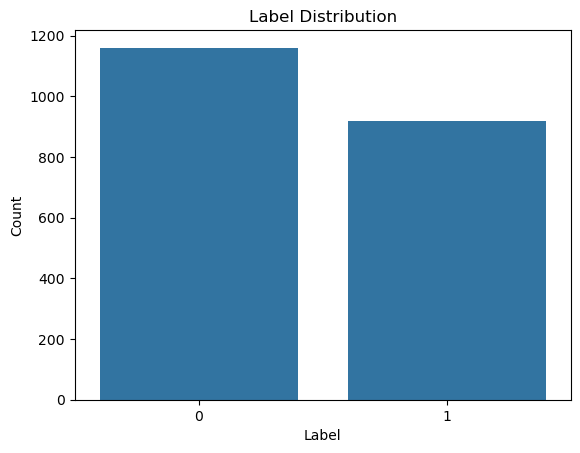


Examples of cyberbullying messages (Label=1):
1160    It certainly ought to Have we finished with th...
1161    Karl Malone is that person I meet that I have ...
1162    There are a lot of morons posting on this site...
1163    justice league scene breakdown <number> batman...
1164    CavusSeyit You are the one who believes in a g...
Name: Message, dtype: object

Examples of non-cyberbullying messages (Label=0):
0    Umm if this movie has not even been started pr...
1    these niggas fake quick to break they will ben...
2                     Why are you related to the judge
3    Even more meticulous interpretations of the Pa...
4    It is the nature of science that scientists ma...
Name: Message, dtype: object


In [5]:
# Check label distribution
label_counts = df['Label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Display some examples of messages
print("\nExamples of cyberbullying messages (Label=1):")
print(df[df['Label'] == 1]['Message'].head())

print("\nExamples of non-cyberbullying messages (Label=0):")
print(df[df['Label'] == 0]['Message'].head())

This code performs two tasks: checking the label distribution and displaying examples of messages with specific labels.

##### Task 1: Check Label Distribution

1. **Calculate the distribution of labels**:
    ```python
    label_counts = df['Label'].value_counts()
    ```
   - `label_counts`: This variable stores the count of each unique value in the 'Label' column.

2. **Create a bar plot to visualize the label distribution**:

##### Task 2: Display Examples of Messages

1. **Display examples of messages labeled as cyberbullying (Label=1)**:
    ```python
    print("\nExamples of cyberbullying messages (Label=1):")
    print(df[df['Label'] == 1]['Message'].head())
    ```
   - This prints a header indicating that examples of cyberbullying messages will follow.
   - `df[df['Label'] == 1]['Message'].head()`: This selects and displays the first few messages where the label is 1 (cyberbullying).

2. **Display examples of messages labeled as non-cyberbullying (Label=0)**:
    ```python
    print("\nExamples of non-cyberbullying messages (Label=0):")
    print(df[df['Label'] == 0]['Message'].head())
    ```
   - This prints a header indicating that examples of non-cyberbullying messages will follow.
   - `df[df['Label'] == 0]['Message'].head()`: This selects and displays the first few messages where the label is 0 (non-cyberbullying).

In [6]:
label_counts = df['Label'].value_counts()

# Print out the counts
print(f"Number of messages labeled as 1 (cyberbullying): {label_counts.get(1, 0)}")
print(f"Number of messages labeled as 0 (not cyberbullying): {label_counts.get(0, 0)}")


Number of messages labeled as 1 (cyberbullying): 919
Number of messages labeled as 0 (not cyberbullying): 1160


This code calculates the distribution of labels in the dataset and prints out the counts for each label.

1. **Calculate the distribution of labels**:
    ```python
    label_counts = df['Label'].value_counts()
    ```
   - `label_counts`: This variable stores the count of each unique value in the 'Label' column.

2. **Print the counts for each label**:
    ```python
    print(f"Number of messages labeled as 1 (cyberbullying): {label_counts.get(1, 0)}")
    print(f"Number of messages labeled as 0 (not cyberbullying): {label_counts.get(0, 0)}")
    ```
   - These two lines print the number of messages for each label.
   - `label_counts.get(1, 0)`: This retrieves the count of messages labeled as 1 (cyberbullying). If there are no such messages, it returns 0.
   - `label_counts.get(0, 0)`: This retrieves the count of messages labeled as 0 (not cyberbullying). If there are no such messages, it returns 0.

In [7]:
# Function to preprocess text
def preprocess_text(text):
    """
    Function to clean and preprocess text for SVM and BERT models.
    Includes: removing special characters, converting to lowercase,
    removing stopwords, lemmatizing, and filtering non-informative messages.
    """
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    
    # Remove special characters and numeric data like dates
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\b\d{1,4}[-/]\d{1,2}[-/]\d{1,4}\b', '', text)  # Remove date-like patterns
    text = re.sub(r'\b\d+\b', '', text)  # Remove standalone numbers
    
    if not text.strip():  # If the text is empty after removing, it's useless
        return None
    
    text = text.lower()  # Convert to lowercase
    
    # Tokenization
    tokens = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens) if tokens else None  # Return None if no tokens remain

This function `preprocess_text` is designed to clean and preprocess text data for use in machine learning models such as SVM (Support Vector Machine) and BERT (Bidirectional Encoder Representations from Transformers). Here's a detailed explanation of each step:

1. **Define the function and docstring**:
    ```python
    def preprocess_text(text):

2. **Remove URLs**:
    ```python
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    ```
   - This line uses a regular expression to remove URLs from the text.

3. **Remove special characters and numeric data like dates**:
    ```python
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\b\d{1,4}[-/]\d{1,2}[-/]\d{1,4}\b', '', text)  # Remove date-like patterns
    text = re.sub(r'\b\d+\b', '', text)  # Remove standalone numbers
    ```
   - These lines use regular expressions to remove special characters, date-like patterns, and standalone numbers from the text.

4. **Filter out non-informative messages**:
    ```python
    if not text.strip():  # If the text is empty after removing, it's useless
        return None
    ```
   - This checks if the text is empty after the previous cleaning steps. If it is, it returns `None`.

5. **Convert text to lowercase**:
    ```python
    text = text.lower()
    ```
   - This converts all characters in the text to lowercase.

6. **Tokenization**:
    ```python
    tokens = text.split()
    ```
   - This splits the text into individual tokens (words).

7. **Remove stopwords**:
    ```python
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    ```
   - This removes common stopwords from the tokens. The `stop_words` set contains common English stopwords.

8. **Lemmatization**:
    ```python
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    ```
   - This lemmatizes the tokens, converting them to their base or root form using the `WordNetLemmatizer`.

9. **Return the cleaned and preprocessed text**:
    ```python
    return ' '.join(tokens) if tokens else None
    ```
   - This joins the tokens back into a single string and returns it. If no tokens remain, it returns `None`.

In [8]:
# Apply preprocessing to the dataset
print("\nPreprocessing the messages...")
df['Cleaned_Message'] = df['Message'].apply(preprocess_text)

# Drop rows where the message is empty or None (i.e., non-informative content)
df = df.dropna(subset=['Cleaned_Message'])


Preprocessing the messages...


This code applies preprocessing to the dataset, drops non-informative rows, encodes the labels, and displays the cleaned dataframe.

##### 1: Apply Preprocessing to the Dataset

1. **Apply the `preprocess_text` function to the 'Message' column and create a new column 'Cleaned_Message'**:
    ```python
    df['Cleaned_Message'] = df['Message'].apply(preprocess_text)
    ```
   - This line applies the previously defined `preprocess_text` function to each message in the 'Message' column and stores the result in a new column 'Cleaned_Message'.

##### 2: Drop Non-Informative Rows

1. **Drop rows where 'Cleaned_Message' is empty or None**:
    ```python
    df = df.dropna(subset=['Cleaned_Message'])
    ```
   - This line drops rows where the 'Cleaned_Message' column contains `None` values, indicating non-informative content.

In [9]:
# Encode labels (if not already numeric)
print("\nEncoding labels...")
label_encoder = LabelEncoder()
df['Encoded_Label'] = label_encoder.fit_transform(df['Label'])
print("Labels encoded as:", label_encoder.classes_)

# Display the cleaned dataframe
print(df.head())


Encoding labels...
Labels encoded as: [0 1]
                                             Message  Label  \
0  Umm if this movie has not even been started pr...      0   
1  these niggas fake quick to break they will ben...      0   
2                   Why are you related to the judge      0   
3  Even more meticulous interpretations of the Pa...      0   
4  It is the nature of science that scientists ma...      0   

                                     Cleaned_Message  Encoded_Label  
0  umm movie even started preproduction speculati...              0  
1                  nigga fake quick break bend nigga              0  
2                                      related judge              0  
3  even meticulous interpretation paleolithic die...              0  
4  nature science scientist make mistake meant ma...              0  


This code encodes the labels, and displays the cleaned dataframe.

##### 1: Encode Labels

1. **Encode the 'Label' column into a new column 'Encoded_Label' using `LabelEncoder`**:
    ```python
    label_encoder = LabelEncoder()
    df['Encoded_Label'] = label_encoder.fit_transform(df['Label'])
    print("Labels encoded as:", label_encoder.classes_)
    ```
   - `LabelEncoder()`: This creates an instance of the `LabelEncoder`.
   - `df['Encoded_Label'] = label_encoder.fit_transform(df['Label'])`: This encodes the 'Label' column into a numeric format and stores the result in a new column 'Encoded_Label'.
   - `print("Labels encoded as:", label_encoder.classes_)`: This prints the classes used for encoding.

##### 2: Display the Cleaned Dataframe

In [10]:
# Count the total number of rows left
total_rows = df.shape[0]

# Count the number of cyberbullying (1) and non-cyberbullying (0) rows
cyberbullying_count = df['Encoded_Label'].value_counts().get(1, 0)  # 1 for cyberbullying
non_cyberbullying_count = df['Encoded_Label'].value_counts().get(0, 0)  # 0 for non-cyberbullying

# Print the counts
print(f"Total number of rows left after preprocessing: {total_rows}")
print(f"Number of cyberbullying messages (labeled as 1): {cyberbullying_count}")
print(f"Number of non-cyberbullying messages (labeled as 0): {non_cyberbullying_count}")

Total number of rows left after preprocessing: 2076
Number of cyberbullying messages (labeled as 1): 917
Number of non-cyberbullying messages (labeled as 0): 1159


In [11]:
# Define the features and labels
X = df['Cleaned_Message']
y = df['Encoded_Label']

# Split the data into 70% training, 15% test, and 15% validation
# First, split into train (70%) and the rest (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Now, split the 30% into test (50%) and validation (50%) to make both test and validation 15% each
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Display the sizes of each dataset
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 1453 samples
Validation set size: 311 samples
Testing set size: 312 samples


This code defines the features and labels, splits the dataset into training, validation, and testing sets.

#### 1: Define Features and Labels

1. **Define the features (X) and labels (y)**:
    ```python
    X = df['Cleaned_Message']
    y = df['Encoded_Label']
    ```
   - `X`: This variable stores the 'Cleaned_Message' column, which contains the preprocessed text data.
   - `y`: This variable stores the 'Encoded_Label' column, which contains the numeric labels.

#### 2: Split the Data

1. **Split the data into 70% training and 30% remaining (test + validation) sets**:
    ```python
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    ```
   - `train_test_split`: This function splits the data into training and remaining sets.
   - `X_train`, `X_temp`: `X_train` contains 70% of the features for training, and `X_temp` contains the remaining 30% for further splitting.
   - `y_train`, `y_temp`: `y_train` contains 70% of the labels for training, and `y_temp` contains the remaining 30% for further splitting.
   - `test_size=0.3`: This parameter sets aside 30% of the data for testing and validation.
   - `random_state=42`: This parameter ensures reproducibility of the split.
   - `stratify=y`: This parameter ensures that the splits maintain the original distribution of labels.

2. **Split the remaining 30% into 15% test and 15% validation sets**:
    ```python
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    ```
   - `train_test_split`: This function splits the remaining data into test and validation sets.
   - `X_val`, `X_test`: `X_val` contains 15% of the features for validation, and `X_test` contains 15% of the features for testing.
   - `y_val`, `y_test`: `y_val` contains 15% of the labels for validation, and `y_test` contains 15% of the labels for testing.
   - `test_size=0.5`: This parameter splits the remaining data evenly into test and validation sets.
   - `random_state=42`: This parameter ensures reproducibility of the split.
   - `stratify=y_temp`: This parameter ensures that the splits maintain the original distribution of labels.

In [12]:
# Initialize the TF-IDF Vectorizer
print("Feature Extraction in Progress...")
tfidf_vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2))


# Fit the vectorizer on the training data and transform all three datasets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("Feature Extraction Completed.")

# Print the shapes of the transformed data
print("\nTF-IDF Vectorization completed.")
print(f"Shape of training data after TF-IDF: {X_train_tfidf.shape}")
print(f"Shape of validation data after TF-IDF: {X_val_tfidf.shape}")
print(f"Shape of testing data after TF-IDF: {X_test_tfidf.shape}")

Feature Extraction in Progress...
Feature Extraction Completed.

TF-IDF Vectorization completed.
Shape of training data after TF-IDF: (1453, 2000)
Shape of validation data after TF-IDF: (311, 2000)
Shape of testing data after TF-IDF: (312, 2000)


This code performs feature extraction on the text data using TF-IDF (Term Frequency-Inverse Document Frequency) Vectorization, and prints the shapes of the transformed datasets.

#### Initialize the TF-IDF Vectorizer

1. **Print a message indicating feature extraction**:
    ```python
    print("Feature Extraction in Progress...")
    ```

2. **Initialize the `TfidfVectorizer`**:
    ```python
    tfidf_vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
    ```
   - `TfidfVectorizer(max_features=2000, ngram_range=(1,2))`: This initializes the `TfidfVectorizer` with a maximum of 2000 features and considers both unigrams and bigrams (i.e., ngram range of 1 to 2).

#### Fit and Transform the Data

1. **Fit the vectorizer on the training data and transform all three datasets**:
    ```python
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_val_tfidf = tfidf_vectorizer.transform(X_val)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    print("Feature Extraction Completed.")
    ```
   - `tfidf_vectorizer.fit_transform(X_train)`: This fits the vectorizer on the training data and transforms it into TF-IDF features.
   - `tfidf_vectorizer.transform(X_val)`: This transforms the validation data into TF-IDF features using the fitted vectorizer.
   - `tfidf_vectorizer.transform(X_test)`: This transforms the test data into TF-IDF features using the fitted vectorizer.
   - `print("Feature Extraction Completed.")`: This prints a message indicating that feature extraction is completed.

In [13]:
# Step 1: Initialize the SVM model with specified parameters
print("Initializing SVM model with C=1, kernel='linear', and default gamma...")
svm_model = SVC(C=1, kernel='linear', probability=True, random_state=42)
print("Initialization completed.")

Initializing SVM model with C=1, kernel='linear', and default gamma...
Initialization completed.


This code initializes the SVM (Support Vector Machine) model with specified parameters.


1. **Initialize the SVM model**:
    ```python
    svm_model = SVC(C=1, kernel='linear', probability=True, random_state=42)
    ```
   - `SVC(C=1, kernel='linear', probability=True, random_state=42)`: This initializes the SVM model with the following parameters:
     - `C=1`: Regularization parameter. A smaller value of C makes the decision surface smoother, while a larger value of C aims to classify all training examples correctly.
     - `kernel='linear'`: Specifies the linear kernel type to be used by the algorithm.
     - `probability=True`: Enables probability estimates, which can be useful for some applications like probabilistic classification.
     - `random_state=42`: Ensures reproducibility by setting a random seed.

In [14]:
# Step 2: Train the model on the TF-IDF-transformed training data
print("Training the SVM model...")
svm_model.fit(X_train_tfidf, y_train)
print("Training completed.")

Training the SVM model...
Training completed.


This code trains the SVM model on the TF-IDF-transformed training data and evaluates the model on the validation dataset.

   - `svm_model.fit(X_train_tfidf, y_train)`: This trains the SVM model using the TF-IDF-transformed training data (`X_train_tfidf`) and the training labels (`y_train`).

In [15]:
# Step 3: Evaluate the model on the validation dataset
print("Evaluating the SVM model on the validation dataset...")
y_val_pred = svm_model.predict(X_val_tfidf)
y_val_proba = svm_model.predict_proba(X_val_tfidf)[:, 1]  # Probability for the positive class (cyberbullying)

Evaluating the SVM model on the validation dataset...


1. **Predict labels for the validation dataset**:
    ```python
    y_val_pred = svm_model.predict(X_val_tfidf)
    ```
   - `y_val_pred`: This variable stores the predicted labels for the validation dataset (`X_val_tfidf`).

3. **Predict probabilities for the validation dataset**:
    ```python
    y_val_proba = svm_model.predict_proba(X_val_tfidf)[:, 1]  # Probability for the positive class (cyberbullying)
    ```
   - `y_val_proba`: This variable stores the predicted probabilities for the positive class (cyberbullying) for the validation dataset. The `[:, 1]` notation selects the probabilities for the positive class.

In [16]:
# Classification report
print("Classification Report on Validation Set:\n")
val_classification_report = classification_report(y_val, y_val_pred, target_names=['Non-Cyberbullying', 'Cyberbullying'])
print(val_classification_report)

Classification Report on Validation Set:

                   precision    recall  f1-score   support

Non-Cyberbullying       0.79      0.82      0.80       174
    Cyberbullying       0.76      0.72      0.74       137

         accuracy                           0.77       311
        macro avg       0.77      0.77      0.77       311
     weighted avg       0.77      0.77      0.77       311



This code generates and prints a classification report for the SVM model on the validation set.

1. **Generate the classification report**:
    ```python
    val_classification_report = classification_report(y_val, y_val_pred, target_names=['Non-Cyberbullying', 'Cyberbullying'])
    ```
   - `classification_report(y_val, y_val_pred, target_names=['Non-Cyberbullying', 'Cyberbullying'])`: This function generates a detailed classification report. The report includes metrics such as precision, recall, and F1-score for each class (Non-Cyberbullying and Cyberbullying).
   - `y_val`: The true labels of the validation dataset.
   - `y_val_pred`: The predicted labels of the validation dataset.

The classification report provides a comprehensive evaluation of the model's performance on the validation set. It includes:
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
- **Recall**: The ratio of correctly predicted positive observations to all observations in the actual class.
- **F1-Score**: The weighted average of precision and recall, providing a single metric that balances both.

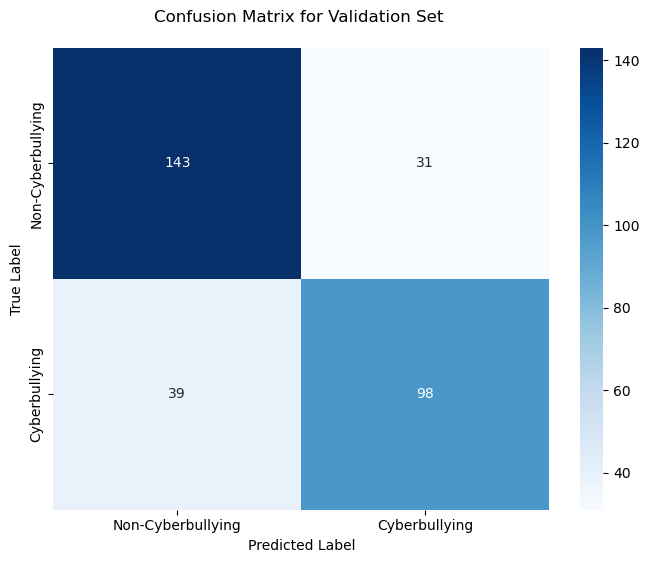

In [17]:
# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Cyberbullying', 'Cyberbullying'], yticklabels=['Non-Cyberbullying', 'Cyberbullying'])
plt.title("Confusion Matrix for Validation Set \n")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

This code generates and visualizes a confusion matrix for the SVM model's performance on the validation set.

#### 1: Generate the Confusion Matrix

1. **Generate the confusion matrix**:
    ```python
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    ```
   - `conf_matrix`: This variable stores the confusion matrix, which compares the true labels (`y_val`) with the predicted labels (`y_val_pred`).

#### 2: Visualize the Confusion Matrix

1. **Create a figure for the confusion matrix**:
    ```python
    plt.figure(figsize=(8, 6))
    ```

2. **Plot the confusion matrix using a heatmap**:
    ```python
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Cyberbullying', 'Cyberbullying'], yticklabels=['Non-Cyberbullying', 'Cyberbullying'])
    ```
   - `sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')`: This function creates a heatmap to visualize the confusion matrix. The `annot=True` parameter adds annotations to the cells, displaying the values. The `fmt='d'` parameter formats the annotations as integers. The `cmap='Blues'` parameter sets the color map to shades of blue.
   - `xticklabels=['Non-Cyberbullying', 'Cyberbullying']`: This sets the x-axis labels to 'Non-Cyberbullying' and 'Cyberbullying'.
   - `yticklabels=['Non-Cyberbullying', 'Cyberbullying']`: This sets the y-axis labels to 'Non-Cyberbullying' and 'Cyberbullying'.

3. **Set the title and labels for the plot**:
    ```python
    plt.title("Confusion Matrix for Validation Set")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    ```
   - `plt.title("Confusion Matrix for Validation Set")`: This sets the title of the plot.
   - `plt.xlabel("Predicted Label")`: This sets the x-axis label to 'Predicted Label'.
   - `plt.ylabel("True Label")`: This sets the y-axis label to 'True Label'.

4. **Display the plot**:
    ```python
    plt.show()
    ```

ROC-AUC Score on Validation Set: 0.8600



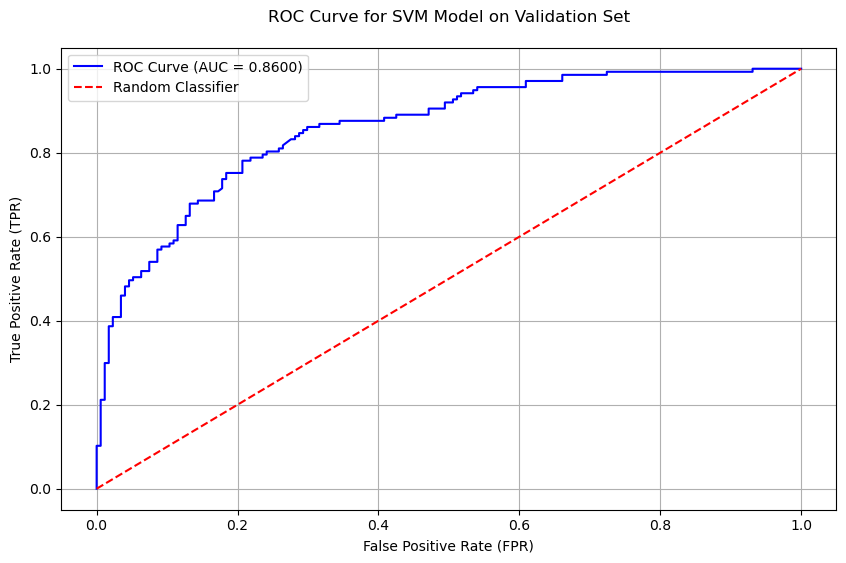

In [18]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_val_proba)
print(f"ROC-AUC Score on Validation Set: {roc_auc:.4f}\n")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.title("ROC Curve for SVM Model on Validation Set\n")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid()
plt.show()

This code calculates the ROC-AUC score and plots the ROC curve to evaluate the SVM model's performance on the validation set.

#### 1: Calculate the ROC-AUC Score

1. **Calculate the ROC-AUC score**:
    ```python
    roc_auc = roc_auc_score(y_val, y_val_proba)
    ```
   - `roc_auc = roc_auc_score(y_val, y_val_proba)`: This calculates the ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score using the true labels (`y_val`) and the predicted probabilities (`y_val_proba`).

2. **Print the ROC-AUC score**:
    ```python
    print(f"ROC-AUC Score on Validation Set: {roc_auc:.4f}")
    ```
   - This prints the ROC-AUC score to the console, formatted to four decimal places.

#### 2: Plot the ROC Curve

1. **Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for the ROC curve**:
    ```python
    fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
    ```
   - `fpr`: This variable stores the false positive rates.
   - `tpr`: This variable stores the true positive rates.
   - `thresholds`: This variable stores the thresholds used to calculate the FPR and TPR.

2. **Create a figure for the ROC curve**:
    ```python
    plt.figure(figsize=(10, 6))
    ```

3. **Plot the ROC curve**:
    ```python
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
    ```
   - This line plots the ROC curve using the FPR and TPR. The ROC curve represents the trade-off between the true positive rate and false positive rate at different threshold settings.
   - The curve is labeled with the AUC score.

4. **Plot the random classifier line**:
    ```python
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
    ```
   - This line represents the performance of a random classifier, serving as a baseline for comparison.

5. **Set the title and labels for the plot**:
    ```python
    plt.title("ROC Curve for SVM Model on Validation Set")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    ```
   - `plt.title("ROC Curve for SVM Model on Validation Set")`: This sets the title of the plot.
   - `plt.xlabel("False Positive Rate (FPR)")`: This sets the x-axis label to 'False Positive Rate (FPR)'.
   - `plt.ylabel("True Positive Rate (TPR)")`: This sets the y-axis label to 'True Positive Rate (TPR)'.

6. **Add a legend and grid**:
    ```python
    plt.legend()
    plt.grid()
    ```

7. **Display the plot**:
    ```python
    plt.show()
    ```

In [19]:
# Step 4: Analyze results
print("Analysis of Results:\n")
print("The classification report provides detailed precision, recall, and F1-score metrics for each class. The confusion matrix visualizes the counts of true positives, true negatives, false positives, and false negatives.\n")
print("The ROC-AUC score and the ROC curve indicate the model's ability to discriminate between classes. A higher AUC suggests better performance.")

Analysis of Results:

The classification report provides detailed precision, recall, and F1-score metrics for each class. The confusion matrix visualizes the counts of true positives, true negatives, false positives, and false negatives.

The ROC-AUC score and the ROC curve indicate the model's ability to discriminate between classes. A higher AUC suggests better performance.


C:\Users\HP\AppData\Local\Temp\ipykernel_1880\380646652.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')


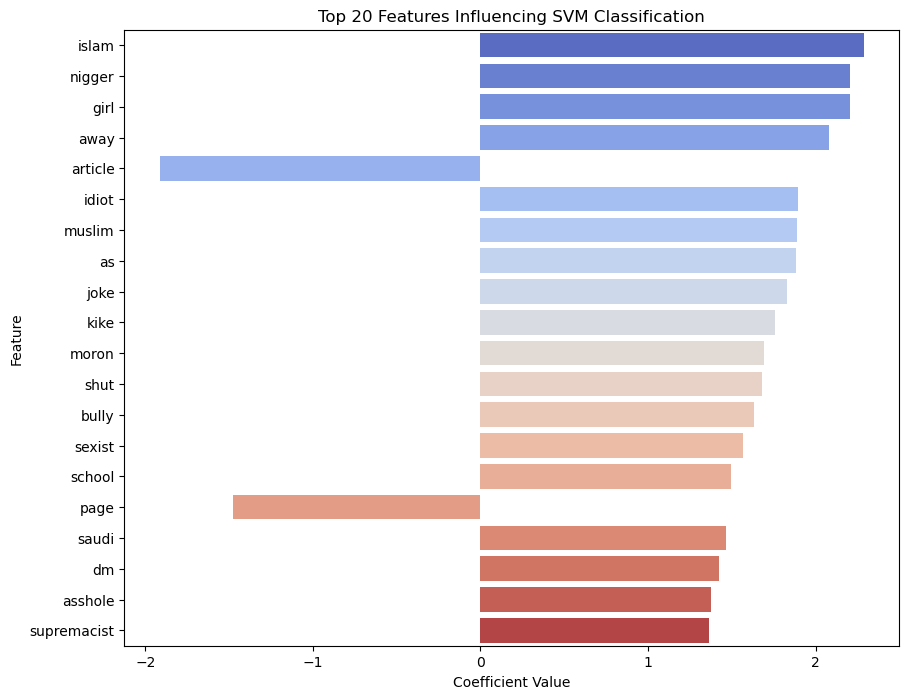

In [20]:
# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the coefficients of the linear SVM and convert them to a dense array if needed
coefficients = svm_model.coef_.toarray()[0]  # Convert sparse to dense array, then select the first row

# Create a DataFrame of features and their corresponding coefficients
feature_coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by absolute value of coefficients
feature_coeff_df['Abs_Coefficient'] = feature_coeff_df['Coefficient'].abs()
feature_coeff_df = feature_coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display top 20 features indicative of cyberbullying
top_features = feature_coeff_df.head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')
plt.title('Top 20 Features Influencing SVM Classification')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()
# else:
#     print("Feature importance analysis is not applicable for non-linear kernels.")

This code extracts and visualizes the top features influencing SVM classification, particularly for identifying cyberbullying messages.

#### 1: Retrieve Feature Names

1. **Retrieve the feature names from the TF-IDF vectorizer**:
    ```python
    feature_names = tfidf_vectorizer.get_feature_names_out()
    ```
   - `feature_names`: This variable stores the names of the features (words/terms) extracted by the TF-IDF vectorizer.

#### 2: Get SVM Coefficients

1. **Get the coefficients of the linear SVM and convert them to a dense array if needed**:
    ```python
    coefficients = svm_model.coef_.toarray()[0]
    ```
   - `coefficients`: This variable stores the coefficients of the linear SVM model, converted to a dense array. These coefficients indicate the importance of each feature in the classification.

#### 3: Create a DataFrame of Features and Coefficients

1. **Create a DataFrame of features and their corresponding coefficients**:
    ```python
    feature_coeff_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })
    ```
   - `feature_coeff_df`: This DataFrame contains the features and their corresponding coefficients.

#### 4: Sort the DataFrame

1. **Sort the DataFrame by the absolute value of coefficients**:
    ```python
    feature_coeff_df['Abs_Coefficient'] = feature_coeff_df['Coefficient'].abs()
    feature_coeff_df = feature_coeff_df.sort_values(by='Abs_Coefficient', ascending=False)
    ```
   - `Abs_Coefficient`: This column stores the absolute value of the coefficients, used for sorting.
   - The DataFrame is sorted in descending order by the absolute value of the coefficients.

#### 5: Visualize Top Features

1. **Display the top 20 features indicative of cyberbullying**:
    ```python
    top_features = feature_coeff_df.head(20)
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')
    plt.title('Top 20 Features Influencing SVM Classification')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()
    ```
   - `top_features`: This DataFrame contains the top 20 features based on the absolute value of their coefficients.
   - A bar plot is created to visualize the top 20 features, with the coefficient values on the x-axis and the feature names on the y-axis.
   - The plot title, x-axis label, and y-axis label are set accordingly.

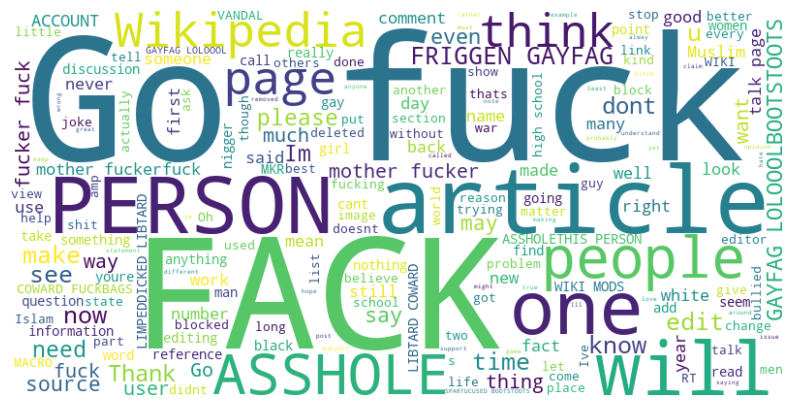

In [21]:
# Wordcloud
text = ' '.join(df['Message'])  # Replace 'text_column' with your actual column name

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

This code generates and displays a word cloud from the text data in the dataset.

#### 1: Prepare the Text Data

1. **Concatenate all text in the 'Message' column into a single string**:
    ```python
    text = ' '.join(df['Message'])  # Replace 'Message' with your actual column name
    ```
   - `text`: This variable stores the concatenated text from the 'Message' column of the dataframe `df`.

#### 2: Create a Word Cloud

1. **Create a word cloud object**:
    ```python
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    ```
   - `WordCloud(width=800, height=400, background_color='white')`: This initializes the `WordCloud` object with a specified width, height, and background color (white).
   - `.generate(text)`: This generates the word cloud from the text data.

#### 3: Display the Word Cloud

1. **Create a figure for the word cloud using matplotlib**:
    ```python
    plt.figure(figsize=(10, 6))
    ```

2. **Display the word cloud**:
    ```python
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axis
    plt.show()
    ```
   - `plt.imshow(wordcloud, interpolation='bilinear')`: This displays the word cloud image with bilinear interpolation for smooth rendering.
   - `plt.axis('off')`: This hides the axis, providing a cleaner visual representation.
   - `plt.show()`: This displays the figure containing the word cloud.

In [22]:
# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'svm_vectorizer.pkl')
print("TF-IDF vectorizer saved successfully as 'svm_vectorizer.pkl'.")

# Save the model
model_path = "svm.pkl"
joblib.dump(svm_model, model_path)
print(f"SVM model saved to {model_path}")

TF-IDF vectorizer saved successfully as 'svm_vectorizer.pkl'.
SVM model saved to svm.pkl


In [23]:
# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define maximum sequence length
MAX_LEN = 128

# Define a custom Dataset class for BERT
class CyberbullyingDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        """
        Initializes the dataset with texts and labels.
        
        Args:
            texts (list): List of text messages.
            labels (list): Corresponding labels (0 or 1).
            tokenizer (BertTokenizer): Pretrained BERT tokenizer.
            max_len (int): Maximum sequence length.
        """
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        """
        Returns the total number of samples.
        """
        return len(self.texts)
    
    def __getitem__(self, idx):
        """
        Generates one sample of data.
        
        Args:
            idx (int): Index of the sample.
        
        Returns:
            dict: Dictionary containing input_ids, attention_mask, and labels.
        """
        text = str(self.texts[idx])
        label = self.labels.iloc[idx]
        
        # Tokenize the text
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,        # Adds [CLS] and [SEP]
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),            # Tensor of shape (max_len)
            'attention_mask': encoding['attention_mask'].flatten(),  # Tensor of shape (max_len)
            'labels': torch.tensor(label, dtype=torch.long)          # Tensor of shape ()
        }

# Create training and testing datasets
train_dataset_bert = CyberbullyingDataset(
    texts=X_train.tolist(),
    labels=y_train,
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

test_dataset_bert = CyberbullyingDataset(
    texts=X_test.tolist(),
    labels=y_test,
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

print("\nBERT Datasets created.")
print(f"Number of training samples: {len(train_dataset_bert)}")
print(f"Number of testing samples: {len(test_dataset_bert)}")


BERT Datasets created.
Number of training samples: 1453
Number of testing samples: 312


This code initializes the BERT tokenizer, defines a custom Dataset class for BERT, and creates training and testing datasets.

#### Step 1: Initialize the BERT Tokenizer

1. **Initialize the BERT tokenizer**:
    ```python
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    ```
   - `BertTokenizer.from_pretrained('bert-base-uncased')`: This initializes the BERT tokenizer using the pre-trained 'bert-base-uncased' model.

#### Step 2: Define Maximum Sequence Length

1. **Define the maximum sequence length**:
    ```python
    MAX_LEN = 128
    ```
   - `MAX_LEN`: This variable sets the maximum length for tokenized sequences.

#### Step 3: Define a Custom Dataset Class for BERT

1. **Define the `CyberbullyingDataset` class**:
    ```python
    class CyberbullyingDataset(Dataset):
    ```
   - This class inherits from `torch.utils.data.Dataset` and customizes it for BERT-based text classification.

2. **Initialize the dataset with texts and labels**:
    ```python
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    ```
   - The `__init__` method initializes the dataset with the provided texts, labels, tokenizer, and maximum sequence length.

3. **Return the total number of samples**:
    ```python
    def __len__(self):
        return len(self.texts)
    ```
   - The `__len__` method returns the total number of samples in the dataset.

4. **Generate one sample of data**:
    ```python
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels.iloc[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }
    ```
   - The `__getitem__` method generates one sample of data. It tokenizes the text and returns a dictionary containing `input_ids`, `attention_mask`, and `labels`.

#### Step 4: Create Training and Testing Datasets

1. **Create the training dataset**:

2. **Create the testing dataset**:

In [24]:
# Define batch size
BATCH_SIZE = 16

# Create DataLoader instances for training and testing
train_loader_bert = DataLoader(
    train_dataset_bert,
    batch_size=BATCH_SIZE,
    shuffle=True  # Shuffle for training to ensure randomness
)

test_loader_bert = DataLoader(
    test_dataset_bert,
    batch_size=BATCH_SIZE,
    shuffle=False  # No need to shuffle during evaluation
)

print("\nDataLoaders for BERT created.")


DataLoaders for BERT created.


#### 1: Define Batch Size

1. **Define the batch size**:
    ```python
    BATCH_SIZE = 16
    ```
   - `BATCH_SIZE`: This variable specifies the number of samples that will be processed together in one batch
#### 2: Create DataLoader Instances

1. **Create the DataLoader for the training dataset**:
    ```python
    train_loader_bert = DataLoader(
        train_dataset_bert,
        batch_size=BATCH_SIZE,
        shuffle=True  # Shuffle for training to ensure randomness
    )
    ```
   - `train_loader_bert`: This DataLoader instance takes the training dataset and splits it into batches of size 16.
   - `shuffle=True`: This parameter shuffles the data to ensure randomness, which is important for training to prevent the model from learning the order of samples.

2. **Create the DataLoader for the testing dataset**:
    ```python
    test_loader_bert = DataLoader(
        test_dataset_bert,
        batch_size=BATCH_SIZE,
        shuffle=False  # No need to shuffle during evaluation
    )
    ```
   - `test_loader_bert`: This DataLoader instance takes the testing dataset and splits it into batches of size 16.
   - `shuffle=False`: This parameter ensures the data is not shuffled during evaluation, maintaining the same order of samples for consistent evaluation.

#### 1: Define Batch Size

1. **Define the batch size**:
    ```python
    BATCH_SIZE = 16
    ```
   - `BATCH_SIZE`: This variable specifies the number of samples that will be processed together in one batch
#### 2: Create DataLoader Instances

1. **Create the DataLoader for the training dataset**:
    ```python
    train_loader_bert = DataLoader(
        train_dataset_bert,
        batch_size=BATCH_SIZE,
        shuffle=True  # Shuffle for training to ensure randomness
    )
    ```
   - `train_loader_bert`: This DataLoader instance takes the training dataset and splits it into batches of size 16.
   - `shuffle=True`: This parameter shuffles the data to ensure randomness, which is important for training to prevent the model from learning the order of samples.

2. **Create the DataLoader for the testing dataset**:
    ```python
    test_loader_bert = DataLoader(
        test_dataset_bert,
        batch_size=BATCH_SIZE,
        shuffle=False  # No need to shuffle during evaluation
    )
    ```
   - `test_loader_bert`: This DataLoader instance takes the testing dataset and splits it into batches of size 16.
   - `shuffle=False`: This parameter ensures the data is not shuffled during evaluation, maintaining the same order of samples for consistent evaluation.

In [25]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2,               # Binary classification
    output_attentions=False,
    output_hidden_states=False
)

# Move the model to the GPU if available
model = model.to(device)

# Define the optimizer with weight decay
optimizer = AdamW(
    model.parameters(),
    lr=2e-5,                    # Learning rate
    eps=1e-8                   # Epsilon for numerical stability
)

# Define the number of training epochs
EPOCHS = 3

# Calculate total steps for the scheduler
total_steps = len(train_loader_bert) * EPOCHS

# Define the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,        # Default value
    num_training_steps=total_steps
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\HP\anaconda3\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


#### Device Configuration
- `device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')`:
  - Automatically selects GPU (CUDA) if available, otherwise falls back to CPU
  - Enables efficient computation by leveraging hardware acceleration

#### Model Initialization
- `BertForSequenceClassification.from_pretrained('bert-base-uncased', ...)`:
  - Uses pre-trained BERT base model for sequence classification
  - Configuration details:
    * `num_labels=2`: Binary classification task
    * `output_attentions=False`: Disables attention weight output
    * `output_hidden_states=False`: Disables hidden state output
- `model.to(device)`: Moves model to selected device (GPU/CPU)

#### Optimizer Configuration
- `AdamW` optimizer:
  - Advanced optimization algorithm with weight decay
  - Hyperparameters:
    * `lr=2e-5`: Low learning rate for fine-tuning
    * `eps=1e-8`: Prevents division by zero, ensures numerical stability

#### Learning Rate Scheduling
- `get_linear_schedule_with_warmup()`:
  - Implements learning rate decay strategy
  - `total_steps`: Calculated from training loader and epochs
  - `num_warmup_steps=0`: No initial warmup period
  - Helps prevent overfitting and improve convergence

#### Training Configuration
- `EPOCHS = 3`: Number of complete training passes through the dataset

In [26]:
# Function to calculate the accuracy of predictions vs labels
def flat_accuracy(preds, labels):
    """
    Calculate the accuracy of predictions.
    
    Args:
        preds (numpy.ndarray): Predictions from the model.
        labels (numpy.ndarray): True labels.
    
    Returns:
        float: Accuracy score.
    """
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Training the BERT model


# Initialize a dictionary to store training history
training_history = {
    'train_loss': [],
    'train_accuracy': [],
    'test_loss': [],
    'test_accuracy': []
}

print("\nStarting BERT training...")

for epoch in range(EPOCHS):
    print(f"\n======== Epoch {epoch + 1} / {EPOCHS} ========")
    print("Training...")
    
    # Measure the training time per epoch
    t0 = time.time()
    
    # Set the model to training mode
    model.train()
    
    # Initialize variables to track training loss and accuracy
    total_train_loss = 0
    total_train_accuracy = 0
    
    for batch in train_loader_bert:
        # Move batch to the device
        b_input_ids = batch['input_ids'].to(device)
        b_attention_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)
        
        # Clear previously calculated gradients
        model.zero_grad()
        
        # Perform a forward pass
        outputs = model(
            input_ids=b_input_ids,
            attention_mask=b_attention_mask,
            labels=b_labels
        )
        
        # Retrieve loss and logits
        loss = outputs.loss
        logits = outputs.logits
        
        # Accumulate the training loss
        total_train_loss += loss.item()
        
        # Perform a backward pass to calculate gradients
        loss.backward()
        
        # Clip the norm of the gradients to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        # Update parameters and take a step using the optimizer
        optimizer.step()
        
        # Update the learning rate
        scheduler.step()
        
        # Calculate the accuracy for this batch
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        total_train_accuracy += flat_accuracy(logits, label_ids)
    
    # Calculate the average training loss and accuracy for this epoch
    avg_train_loss = total_train_loss / len(train_loader_bert)
    avg_train_accuracy = total_train_accuracy / len(train_loader_bert)
    
    # Record the training loss and accuracy
    training_history['train_loss'].append(avg_train_loss)
    training_history['train_accuracy'].append(avg_train_accuracy)
    
    print(f"  Average training loss: {avg_train_loss:.2f}")
    print(f"  Average training accuracy: {avg_train_accuracy:.2f}")
    
    # ========================================
    #               Validation
    # ========================================
    
    print("Running Validation...")
    
    # Set the model to evaluation mode
    model.eval()
    
    # Initialize variables to track validation loss and accuracy
    total_eval_loss = 0
    total_eval_accuracy = 0
    
    # Disable gradient calculations for validation
    with torch.no_grad():
        for batch in test_loader_bert:
            # Move batch to the device
            b_input_ids = batch['input_ids'].to(device)
            b_attention_mask = batch['attention_mask'].to(device)
            b_labels = batch['labels'].to(device)
            
            # Perform a forward pass
            outputs = model(
                input_ids=b_input_ids,
                attention_mask=b_attention_mask,
                labels=b_labels
            )
            
            # Retrieve loss and logits
            loss = outputs.loss
            logits = outputs.logits
            
            # Accumulate the validation loss
            total_eval_loss += loss.item()
            
            # Calculate the accuracy for this batch
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()
            total_eval_accuracy += flat_accuracy(logits, label_ids)
    
    # Calculate the average validation loss and accuracy for this epoch
    avg_val_loss = total_eval_loss / len(test_loader_bert)
    avg_val_accuracy = total_eval_accuracy / len(test_loader_bert)
    
    # Record the validation loss and accuracy
    training_history['test_loss'].append(avg_val_loss)
    training_history['test_accuracy'].append(avg_val_accuracy)
    
    print(f"  Average Validation Loss: {avg_val_loss:.2f}")
    print(f"  Average Validation Accuracy: {avg_val_accuracy:.2f}")
    
    # Measure how long the epoch took
    elapsed = time.time() - t0
    print(f"  Epoch took: {elapsed:.2f} seconds")


Starting BERT training...

======== Epoch 1 / 3 ========
Training...
  Average training loss: 0.54
  Average training accuracy: 0.72
Running Validation...
  Average Validation Loss: 0.50
  Average Validation Accuracy: 0.77
  Epoch took: 1085.78 seconds

======== Epoch 2 / 3 ========
Training...
  Average training loss: 0.38
  Average training accuracy: 0.83
Running Validation...
  Average Validation Loss: 0.47
  Average Validation Accuracy: 0.78
  Epoch took: 1026.41 seconds

======== Epoch 3 / 3 ========
Training...
  Average training loss: 0.28
  Average training accuracy: 0.89
Running Validation...
  Average Validation Loss: 0.48
  Average Validation Accuracy: 0.80
  Epoch took: 892.66 seconds


This implements a training for BERT (Bidirectional Encoder Representations from Transformers) model, specifically designed for binary classification tasks. The code systematically trains the model, tracks its performance, and iteratively improves its predictive capabilities.

#### Accuracy Calculation Function
The `flat_accuracy()` function is crucial for performance evaluation. It transforms model predictions from probability distributions to discrete class predictions by:
1. Using `np.argmax()` to find the index of the highest probability for each prediction
2. Flattening both predictions and true labels
3. Calculating the percentage of correctly predicted labels by comparing the flattened arrays

#### Training Loop Structure
The training process is divided into two primary phases for each epoch:
1. **Training Phase**: 
   - Prepares the model for learning by setting it to training mode
   - Iterates through batches of training data
   - Executes a comprehensive model update cycle:
     * Moves input data (input IDs, attention masks, labels) to the selected device
     * Clears previous gradient calculations
     * Performs a forward pass to generate predictions
     * Calculates loss between predictions and true labels
     * Computes gradients via backpropagation
     * Applies gradient clipping to prevent exploding gradients
     * Updates model parameters using the optimizer
     * Adjusts learning rate with the scheduler
     * Tracks training loss and accuracy

2. **Validation Phase**:
   - Switches model to evaluation mode
   - Disables gradient calculations for inference
   - Processes test data batches
   - Computes validation loss and accuracy without model updates

#### Performance Tracking
A `training_history` dictionary captures critical metrics across epochs:
- Training loss: Average loss during model parameter updates
- Training accuracy: Percentage of correct predictions during training
- Test loss: Average loss on validation dataset
- Test accuracy: Percentage of correct predictions on validation dataset

#### Optimization Techniques
- **Gradient Clipping**: Prevents exploding gradients by limiting gradient norm
- **Learning Rate Scheduling**: Dynamically adjusts learning rate for stable convergence
- **Device Flexibility**: Automatically uses GPU if available, falls back to CPU

#### Epoch Reporting
For each training cycle, the script prints:
- Current epoch number
- Average training loss
- Average training accuracy
- Average validation loss
- Average validation accuracy
- Total epoch processing time

In [27]:
# Function to calculate metrics
def evaluate_model(model, data_loader):
    """
    Evaluates the BERT model on the given data loader.
    
    Args:
        model (BertForSequenceClassification): The trained BERT model.
        data_loader (DataLoader): DataLoader for the dataset to evaluate.
    
    Returns:
        dict: Dictionary containing loss, accuracy, predictions, and true labels.
    """
    model.eval()
    
    total_eval_loss = 0
    total_eval_accuracy = 0
    predictions = []
    true_labels = []
    
    # Disable gradient calculations
    with torch.no_grad():
        for batch in data_loader:
            # Move batch to the device
            b_input_ids = batch['input_ids'].to(device)
            b_attention_mask = batch['attention_mask'].to(device)
            b_labels = batch['labels'].to(device)
            
            # Forward pass
            outputs = model(
                input_ids=b_input_ids,
                attention_mask=b_attention_mask,
                labels=b_labels
            )
            
            # Retrieve loss and logits
            loss = outputs.loss
            logits = outputs.logits
            
            # Accumulate the loss
            total_eval_loss += loss.item()
            
            # Move logits and labels to CPU for evaluation
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()
            
            # Calculate accuracy
            total_eval_accuracy += flat_accuracy(logits, label_ids)
            
            # Store predictions and true labels
            predictions.extend(np.argmax(logits, axis=1).flatten())
            true_labels.extend(label_ids.flatten())
    
    # Calculate average loss and accuracy
    avg_loss = total_eval_loss / len(data_loader)
    avg_accuracy = total_eval_accuracy / len(data_loader)
    
    # Calculate AUC-ROC
    # For AUC, we need the probability estimates
    y_true = np.array(true_labels)
    y_pred = np.array(predictions)
    
    # Since we used argmax, to get probabilities, we need to run the model again
    # Alternatively, we can store the probabilities during evaluation
    # Here, we calculate AUC-ROC based on the predicted labels
    auc = roc_auc_score(y_true, y_pred)
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    
    return {
        'loss': avg_loss,
        'accuracy': avg_accuracy,
        'predictions': y_pred,
        'true_labels': y_true,
        'fpr': fpr,
        'tpr': tpr,
        'auc': auc
    }

#### Purpose of ROC Curve
- Visualizes binary classification model performance
- Shows trade-off between true positive rate and false positive rate
- Helps assess model's discriminative ability

#### Key Components
- X-axis: False Positive Rate (FPR)
- Y-axis: True Positive Rate (TPR)
- Diagonal line: Represents random classifier performance
- AUC (Area Under Curve): Summarizes overall model performance

#### Plot Details
- Uses `plt.figure(figsize=(8,6))` for visualization size
- Plots model's ROC curve in dark orange
- Includes diagonal reference line
- Displays AUC value in legend

#### Interpretation
- Curve above diagonal line indicates better-than-random classification
- Closer curve is to top-left corner, better model's performance
- AUC value close to 1 suggests strong predictive power

In [28]:
# Evaluate the BERT model on the test set
print("Evaluating the BERT model on the test set...\n")
bert_evaluation = evaluate_model(model, test_loader_bert)

# Display the evaluation metrics
print(f"\nBERT Test Loss: {bert_evaluation['loss']:.2f}")
print(f"BERT Test Accuracy: {bert_evaluation['accuracy']:.2f}")
print(f"BERT Test AUC: {bert_evaluation['auc']:.2f}")

Evaluating the BERT model on the test set...


BERT Test Loss: 0.48
BERT Test Accuracy: 0.80
BERT Test AUC: 0.80


#### Model Evaluation Process
- Uses `evaluate_model()` function to assess BERT model performance
- Applies model to test dataset 
- Calculates key performance metrics

#### Performance Metrics
- **Test Loss**: Measures model's prediction error
- **Test Accuracy**: Percentage of correct predictions
- **Test AUC (Area Under Curve)**: Overall model discriminative power

#### Significance
- Provides comprehensive performance snapshot
- Helps validate model's predictive capabilities
- Enables comparison with other models/baselines

In [29]:
# Classification Report
print("BERT Classification Report:\n")
print(classification_report(bert_evaluation['true_labels'], bert_evaluation['predictions']))

BERT Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       174
           1       0.75      0.83      0.79       138

    accuracy                           0.80       312
   macro avg       0.80      0.80      0.80       312
weighted avg       0.81      0.80      0.80       312



#### Key Metrics Typically Included
- Precision: Accuracy of positive predictions
- Recall: Proportion of actual positives correctly identified
- F1-Score: Balanced measure of precision and recall
- Support: Number of instances for each class

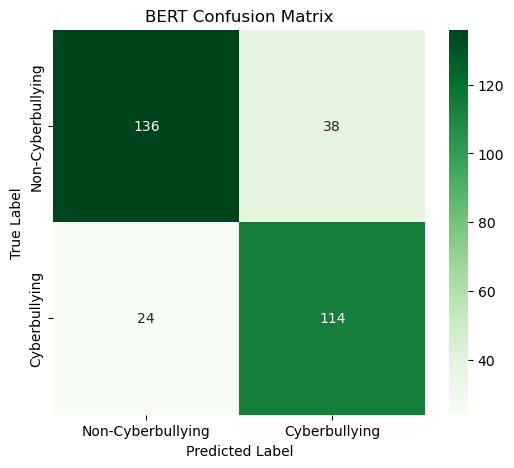

In [30]:
# Confusion Matrix
conf_matrix_bert = confusion_matrix(bert_evaluation['true_labels'], bert_evaluation['predictions'])
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_bert, annot=True, fmt='d', cmap='Greens', xticklabels=['Non-Cyberbullying', 'Cyberbullying'], yticklabels=['Non-Cyberbullying', 'Cyberbullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('BERT Confusion Matrix')
plt.show()

#### Matrix Breakdown
- Rows: True Labels
- Columns: Predicted Labels
- Color Intensity: Indicates classification frequency
- Green Heatmap: Visualizes prediction accuracy

#### Key Insights
- Diagonal values represent correct predictions
- Off-diagonal values show misclassifications
- Helps identify:
 * Prediction errors
 * Potential class bias
 * Model's classification strengths/weaknesses

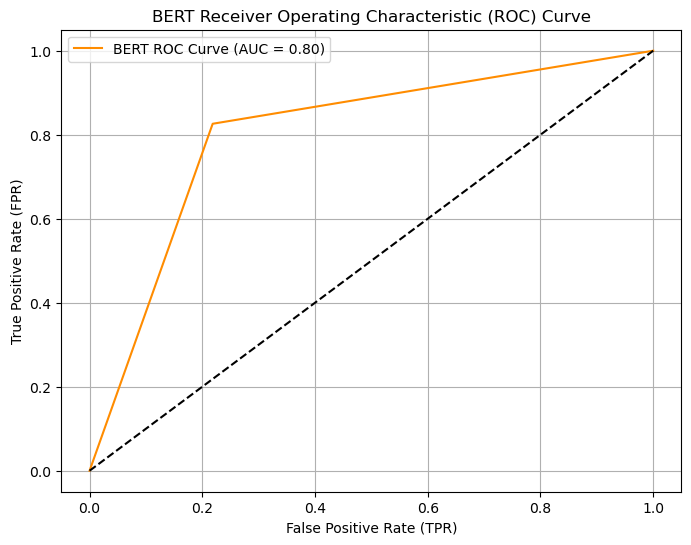

In [31]:
# ROC Curve
plt.figure(figsize=(8,6))
plt.plot(bert_evaluation['fpr'], bert_evaluation['tpr'], label=f'BERT ROC Curve (AUC = {bert_evaluation["auc"]:.2f})', color='darkorange')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate (TPR)')
plt.ylabel('True Positive Rate (FPR)')
plt.title('BERT Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

#### Key Elements
- Dark Orange Curve: Model's classification performance
- Diagonal Line: Random classifier baseline
- AUC (Area Under Curve): Quantitative performance metric

#### Interpretation
- Curve above diagonal: Better than random prediction
- Higher AUC (closer to 1): Stronger predictive power

In [32]:
# Load preprocessed data
texts = df['Message'].tolist()
labels = df['Label'].tolist()

# 1. Tokenize and Generate BERT Embeddings
def generate_bert_embeddings(texts, batch_size=16):
    """
    Generate embeddings using the fine-tuned BERT model.
    """
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    model.eval()  # Set BERT to evaluation mode

    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        inputs = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt", max_length=128)
        
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Extract [CLS] token embeddings for each text
        cls_embeddings = outputs.last_hidden_state[:, 0, :].numpy()
        embeddings.append(cls_embeddings)
    
    return np.vstack(embeddings)

# Generate embeddings for the dataset
bert_embeddings = generate_bert_embeddings(texts)

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(bert_embeddings, labels, test_size=0.2, random_state=42)

# 3. Train SVM Classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

# 4. Test the Hybrid Model
y_pred = svm_classifier.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       236
           1       0.64      0.60      0.62       180

    accuracy                           0.68       416
   macro avg       0.67      0.67      0.67       416
weighted avg       0.68      0.68      0.68       416

Accuracy: 0.6778846153846154


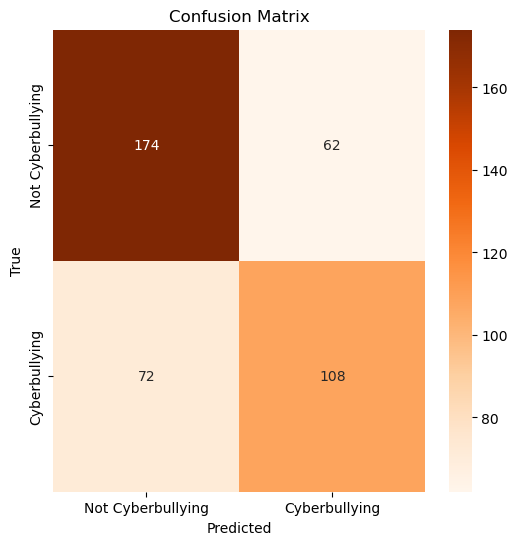

In [33]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Cyberbullying', 'Cyberbullying'], yticklabels=['Not Cyberbullying', 'Cyberbullying'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

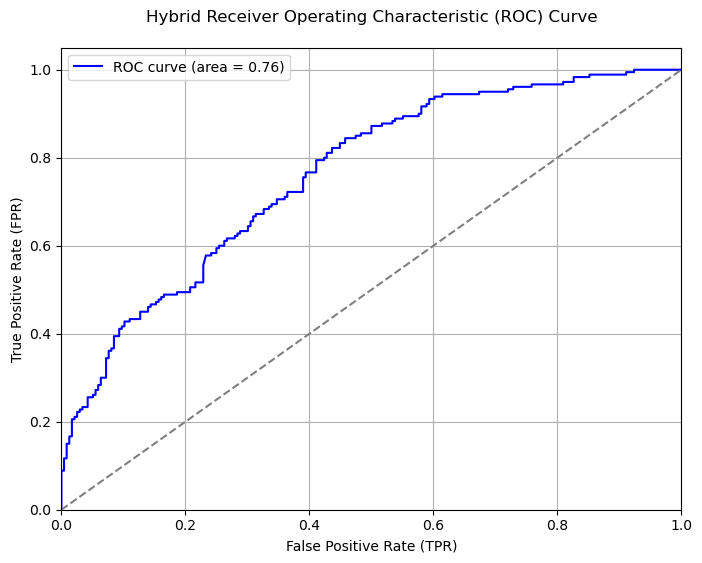

In [34]:
# Get predicted probabilities
y_prob = svm_classifier.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (TPR)')
plt.ylabel('True Positive Rate (FPR)')
plt.title('Hybrid Receiver Operating Characteristic (ROC) Curve\n')
plt.legend()
plt.grid()
plt.show()


In [35]:
# Save SVM Classifier
joblib.dump(svm_classifier, "hybrid_svm_classifier.pkl")
print("Hybrid SVM Classifier saved as 'hybrid_svm_classifier.pkl'.")

# # Save BERT Model
# joblib.dump(bert_embeddings, "hybrid_bert_model.pkl")
# print("Hybrid BERT Model saved as 'hybrid_bert_model.pkl'.")

# Save BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenizer.save_pretrained("./hybrid_bert_tokenizer")
print("BERT Tokenizer saved in 'hybrid_bert_tokenizer/'.")

Hybrid SVM Classifier saved as 'hybrid_svm_classifier.pkl'.
BERT Tokenizer saved in 'hybrid_bert_tokenizer/'.


In [36]:
import joblib
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F

def test_saved_model(message, model_type):
    """
    Tests a single message against the specified saved pre-trained model.

    Parameters:
    message (str): The input text message to classify.
    model_type (str): The model to use for prediction - 'svm', 'bert', or 'hybrid'.

    Returns:
    str: Prediction result - 'Cyberbullying' or 'Not Cyberbullying'.
    """
    # Test with SVM model
    if model_type.lower() == "svm":
        # Load saved TF-IDF vectorizer and SVM model
        tfidf_vectorizer = joblib.load("svm_vectorizer.pkl")  # Pre-saved vectorizer
        svm_model = joblib.load("svm.pkl")  # Pre-trained SVM model

        # Transform the input message using the vectorizer
        message_vector = tfidf_vectorizer.transform([message])  # Direct transformation
        
        # Make prediction using the saved SVM model
        prediction = svm_model.predict(message_vector)[0]

    # Test with BERT model
    elif model_type.lower() == "bert":
        # Load pre-trained BERT tokenizer and model directly from Hugging Face
        tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # Load pre-trained tokenizer
        bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Load pre-trained model

        bert_model.eval()  # Set to evaluation mode

        # Encode the message for BERT
        inputs = tokenizer.encode_plus(
            message,
            add_special_tokens=True,
            max_length=128,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        # Predict using the BERT model
        with torch.no_grad():
            outputs = bert_model(inputs["input_ids"], attention_mask=inputs["attention_mask"])
            logits = outputs.logits
            prediction = torch.argmax(F.softmax(logits, dim=1), dim=1).item()

    # Test with Hybrid model
    elif model_type.lower() == "hybrid":
        # Load the pre-trained BERT tokenizer
        tokenizer = BertTokenizer.from_pretrained("./hybrid_bert_tokenizer")
        
        # Load the SVM classifier
        svm_classifier = joblib.load("hybrid_svm_classifier.pkl")
        
        # Load the pre-trained BERT model
        model = BertModel.from_pretrained("bert-base-uncased")
        model.eval()  # Set BERT to evaluation mode

        # Tokenize and prepare the input for BERT
        inputs = tokenizer.encode_plus(
            message,
            add_special_tokens=True,
            max_length=128,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        # Extract embeddings using BERT model
        with torch.no_grad():
            outputs = model(**inputs)  # Get BERT outputs
            cls_embedding = outputs.last_hidden_state[:, 0, :].numpy()  # Extract [CLS] token embeddings
        
        # Use the SVM model to make a prediction on the extracted features
        prediction = svm_classifier.predict(cls_embedding)[0]


    # Map the numeric prediction to human-readable labels
    return "Cyberbullying" if prediction == 1 else "Not Cyberbullying"


In [37]:
test_saved_model("fuck boy", "svm")

'Cyberbullying'